<a href="https://colab.research.google.com/github/Matteriegray/AnomalyDetect/blob/main/AnomayAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

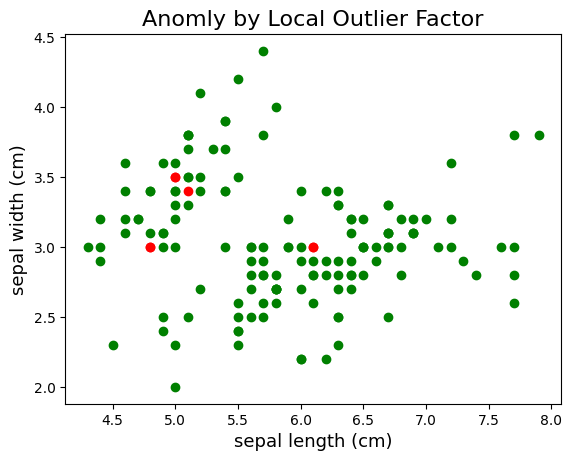

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor

df = load_iris(as_frame=True).frame
X = df[['sepal length (cm)','sepal width (cm)']]

# Here we can use any model like LOF, Isolation forest, One-class SVM, Elliptic- Envelope
model = LocalOutlierFactor(n_neighbors=5)

model.fit(X)

scores = model.negative_outlier_factor_

# Identify the points with the highest outlier scores
outliers = np.argwhere(scores > np.percentile(scores, 95))

# Plot anomly
colors=['green','red']

for i in range(len(X)):
	if i not in outliers:
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # Not anomly
	else:
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # anomly

plt.xlabel('sepal length (cm)',fontsize=13)
plt.ylabel('sepal width (cm)',fontsize=13)
plt.title('Anomly by Local Outlier Factor',fontsize=16)
plt.show()
